In [41]:
import binance as bn
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

In [42]:
apikey = 'liKK2OeELrOmknYEOvoua4kRcbVBq3y4RvNDluCLdnGuj0BMly9VkWh9AgLblq5Q'
secret = 'V36ed6ctcsrIliMVro0r5tkZXoJt4ovxMCkus8RjJyCDxBfBb7PlmiC022vQjnjG'

In [43]:
client = bn.Client(apikey, secret)

In [44]:
START_DATE = "1 JAN 2020"
TICKER = "BTCUSDT"

In [45]:
df = pd.DataFrame(client.get_historical_klines(TICKER, client.KLINE_INTERVAL_1MINUTE, start_str = START_DATE))

In [46]:
df.columns=["Open Time","Open", "High", "Low", "Close", "Volume","Close Time","Quote Asset Volume", "Number of Trades", "TB Base Volume", "TB Quote Volume", "Ignore"]

In [47]:
df.drop("Ignore", axis=1, inplace = True)
df.drop("Close Time", axis=1, inplace = True)

In [48]:
columns = ["Open Time","Open", "High", "Low", "Close", "Volume","Quote Asset Volume", "Number of Trades", "TB Base Volume", "TB Quote Volume"]
num_columns = ["Open", "High", "Low", "Close", "Volume", "Quote Asset Volume", "Number of Trades", "TB Base Volume", "TB Quote Volume"]

In [49]:
df[num_columns] = df[num_columns].apply(pd.to_numeric, axis=1)

In [50]:
df["Open Time"] = pd.to_datetime(df["Open Time"]/1000, unit = "s")

In [51]:
df["Delta"] = df["Close"] - df["Open"]

In [52]:
df = df.iloc[1:].reset_index()
df.drop("index", axis = 1, inplace = True)

In [53]:
day_of_week = []
day_of_month = []
month_of_year = []
week_of_year = []
hour_of_day = []
minute_of_hour = []
for i in range(len(df)):
    temp = df["Open Time"][i]
    day_of_week.append(temp.dayofweek)
    day_of_month.append(temp.day)
    month_of_year.append(temp.month)
    week_of_year.append(temp.week)
    hour_of_day.append(temp.hour)
    minute_of_hour.append(temp.minute)
df["Day of Week"] = day_of_week
df["Day of Month"] = day_of_month
df["Month of Year"] = month_of_year
df["Week of Year"] = week_of_year
df["Hour of Day"] = hour_of_day
df["Minute of Hour"] = minute_of_hour

In [54]:
df.drop("Open Time", axis = 1, inplace = True)

In [55]:
columns = ["Open", "High", "Low", "Close", "Volume","Quote Asset Volume", "Number of Trades", "TB Base Volume", "TB Quote Volume", "Day of Week", "Day of Month", "Month of Year", "Week of Year", "Hour of Day", "Minute of Hour", "Shift Close","Delta", "SignDelta"]
num_columns = ["Open", "High", "Low", "Close", "Volume","Quote Asset Volume", "Number of Trades", "TB Base Volume", "TB Quote Volume", "Day of Week", "Day of Month", "Month of Year", "Week of Year", "Hour of Day", "Minute of Hour"]

In [56]:
def score(X, y, clf):
  X_tr, X_t = X[:int(len(X)*0.8)],  X[int(len(X)*0.8)+1:]
  y_tr, y_t = y[:int(len(y)*0.8)],  y[int(len(y)*0.8)+1:]
  accuracy = cross_val_score(clf, X, y, cv=10)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracy.mean(), accuracy.std()))
  recall = cross_val_score(clf, X, y, scoring = 'recall', cv=10)
  print("%0.2f recall with a standard deviation of %0.2f" % (recall.mean(), recall.std()))
  precision = cross_val_score(clf, X, y, scoring = 'precision', cv=10)
  print("%0.2f precision with a standard deviation of %0.2f" % (precision.mean(), precision.std()))
  f1 = cross_val_score(clf, X, y, scoring = 'f1', cv=10)
  print("%0.2f f1 with a standard deviation of %0.2f" % (f1.mean(), f1.std()))
  clf = clf.fit(X_tr, y_tr)
  fpr, tpr, _ = metrics.roc_curve(y_t,  clf.predict_proba(X_t)[:,1])
  auc = metrics.roc_auc_score(y_t, clf.predict_proba(X_t)[:,1])
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()
  return accuracy.mean(), accuracy.std(), recall.mean(), recall.std(),  precision.mean(), precision.std(), f1.mean(), f1.std()

In [57]:
lr_accuracy = [[],[]]
lr_recall = [[],[]]
lr_precision = [[],[]]
lr_f1 = [[],[]]

knn_accuracy = [[],[]]
knn_recall = [[],[]]
knn_precision = [[],[]]
knn_f1 = [[],[]]

tree_accuracy = [[],[]]
tree_recall = [[],[]]
tree_precision = [[],[]]
tree_f1 = [[],[]]

rnd_accuracy = [[],[]]
rnd_recall = [[],[]]
rnd_precision = [[],[]]
rnd_f1 = [[],[]]

LR i = 1
0.50 accuracy with a standard deviation of 0.00
0.52 recall with a standard deviation of 0.25
0.50 precision with a standard deviation of 0.01
0.47 f1 with a standard deviation of 0.14


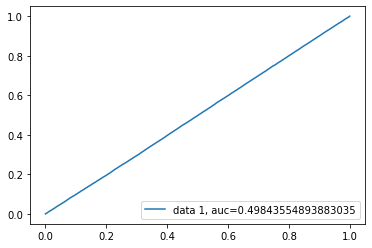

KNN i = 1
0.49 accuracy with a standard deviation of 0.00
0.48 recall with a standard deviation of 0.06
0.49 precision with a standard deviation of 0.01
0.48 f1 with a standard deviation of 0.03


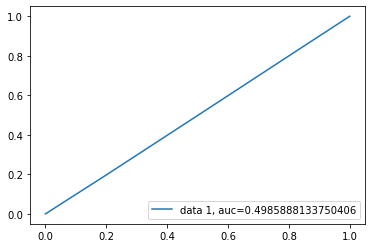

TREE i = 1
0.49 accuracy with a standard deviation of 0.01
0.45 recall with a standard deviation of 0.06
0.49 precision with a standard deviation of 0.01
0.46 f1 with a standard deviation of 0.06


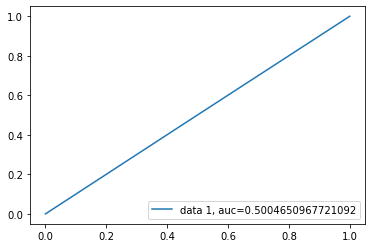

RND i = 1
0.49 accuracy with a standard deviation of 0.01
0.40 recall with a standard deviation of 0.17
0.49 precision with a standard deviation of 0.01
0.42 f1 with a standard deviation of 0.11


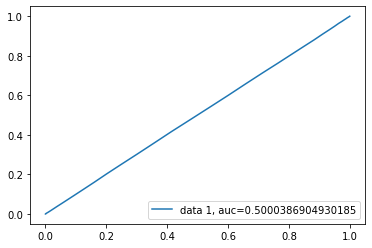

LR i = 5
0.50 accuracy with a standard deviation of 0.01
0.58 recall with a standard deviation of 0.29
0.51 precision with a standard deviation of 0.01
0.50 f1 with a standard deviation of 0.14


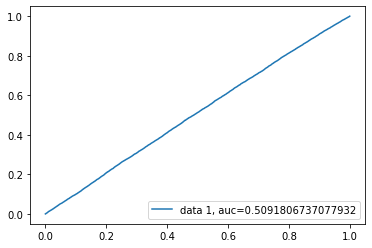

KNN i = 5
0.49 accuracy with a standard deviation of 0.01
0.48 recall with a standard deviation of 0.07
0.49 precision with a standard deviation of 0.01
0.48 f1 with a standard deviation of 0.05


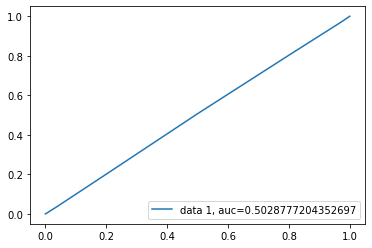

TREE i = 5
0.49 accuracy with a standard deviation of 0.01
0.42 recall with a standard deviation of 0.13
0.49 precision with a standard deviation of 0.02
0.44 f1 with a standard deviation of 0.10


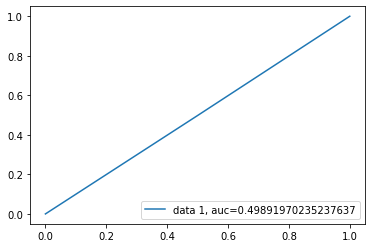

RND i = 5
0.49 accuracy with a standard deviation of 0.01
0.41 recall with a standard deviation of 0.18
0.48 precision with a standard deviation of 0.02
0.41 f1 with a standard deviation of 0.13


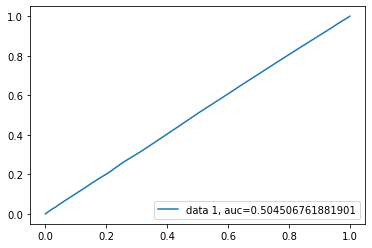

LR i = 10
0.50 accuracy with a standard deviation of 0.01
0.57 recall with a standard deviation of 0.28
0.50 precision with a standard deviation of 0.02
0.49 f1 with a standard deviation of 0.15


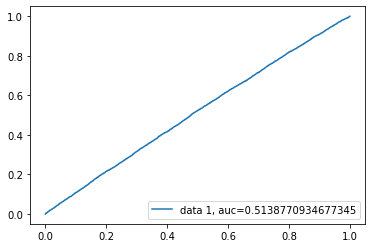

KNN i = 10
0.48 accuracy with a standard deviation of 0.02
0.47 recall with a standard deviation of 0.08
0.48 precision with a standard deviation of 0.02
0.47 f1 with a standard deviation of 0.05


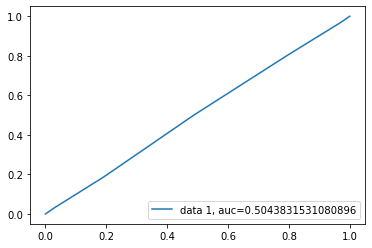

TREE i = 10
0.48 accuracy with a standard deviation of 0.02
0.40 recall with a standard deviation of 0.14
0.47 precision with a standard deviation of 0.04
0.42 f1 with a standard deviation of 0.12


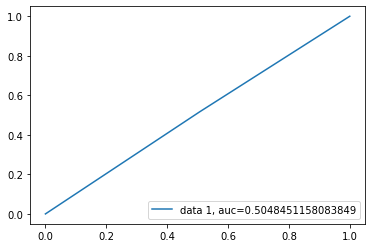

RND i = 10
0.48 accuracy with a standard deviation of 0.02
0.42 recall with a standard deviation of 0.17
0.46 precision with a standard deviation of 0.05
0.43 f1 with a standard deviation of 0.14


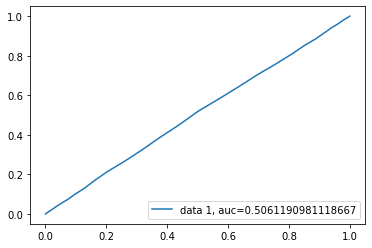

LR i = 50
0.49 accuracy with a standard deviation of 0.02
0.60 recall with a standard deviation of 0.25
0.50 precision with a standard deviation of 0.03
0.52 f1 with a standard deviation of 0.12


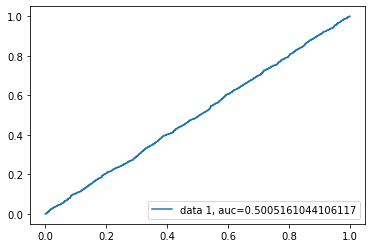

KNN i = 50
0.47 accuracy with a standard deviation of 0.02
0.47 recall with a standard deviation of 0.10
0.48 precision with a standard deviation of 0.03
0.47 f1 with a standard deviation of 0.06


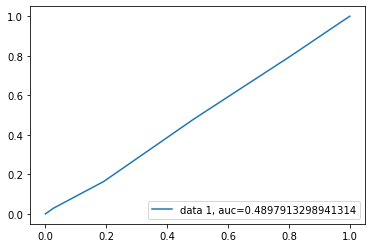

TREE i = 50
0.47 accuracy with a standard deviation of 0.03
0.45 recall with a standard deviation of 0.12
0.47 precision with a standard deviation of 0.05
0.45 f1 with a standard deviation of 0.10


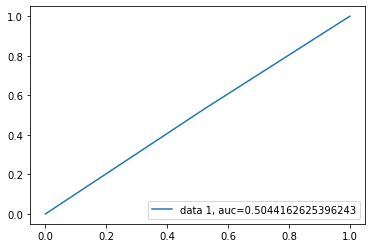

RND i = 50
0.47 accuracy with a standard deviation of 0.04
0.50 recall with a standard deviation of 0.20
0.47 precision with a standard deviation of 0.05
0.47 f1 with a standard deviation of 0.12


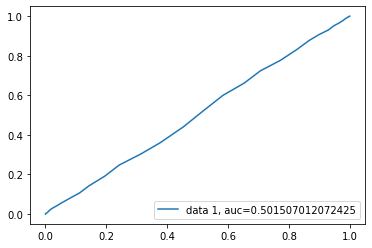

LR i = 100
0.49 accuracy with a standard deviation of 0.02
0.56 recall with a standard deviation of 0.19
0.51 precision with a standard deviation of 0.02
0.52 f1 with a standard deviation of 0.09


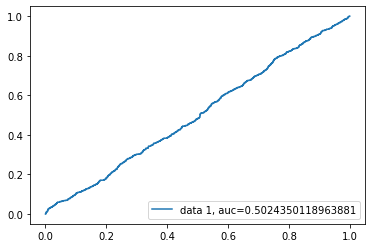

KNN i = 100
0.49 accuracy with a standard deviation of 0.02
0.47 recall with a standard deviation of 0.12
0.50 precision with a standard deviation of 0.02
0.48 f1 with a standard deviation of 0.07


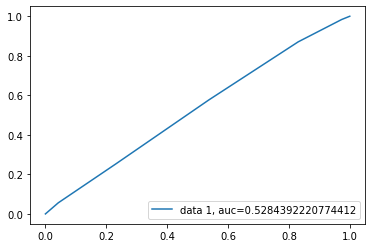

TREE i = 100
0.50 accuracy with a standard deviation of 0.01
0.50 recall with a standard deviation of 0.06
0.52 precision with a standard deviation of 0.01
0.51 f1 with a standard deviation of 0.03


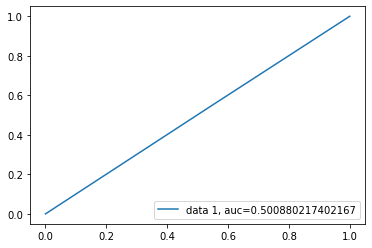

RND i = 100
0.49 accuracy with a standard deviation of 0.02
0.49 recall with a standard deviation of 0.21
0.50 precision with a standard deviation of 0.02
0.50 f1 with a standard deviation of 0.11


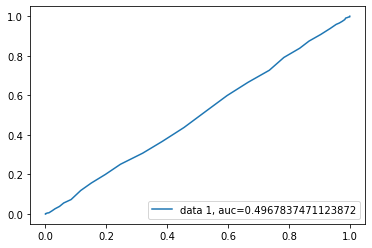

LR i = 300
0.47 accuracy with a standard deviation of 0.07
0.47 recall with a standard deviation of 0.24
0.45 precision with a standard deviation of 0.10
0.45 f1 with a standard deviation of 0.16


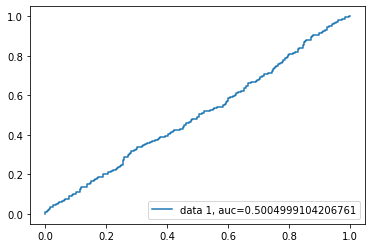

KNN i = 300
0.43 accuracy with a standard deviation of 0.07
0.41 recall with a standard deviation of 0.18
0.41 precision with a standard deviation of 0.12
0.40 f1 with a standard deviation of 0.15


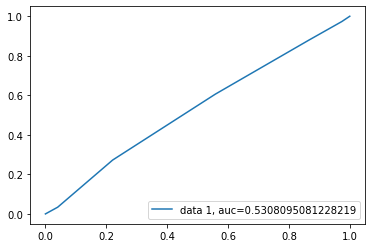

TREE i = 300
0.46 accuracy with a standard deviation of 0.04
0.42 recall with a standard deviation of 0.15
0.46 precision with a standard deviation of 0.08
0.43 f1 with a standard deviation of 0.13


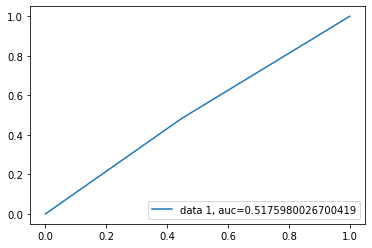

RND i = 300
0.43 accuracy with a standard deviation of 0.08
0.45 recall with a standard deviation of 0.23
0.40 precision with a standard deviation of 0.12
0.41 f1 with a standard deviation of 0.18


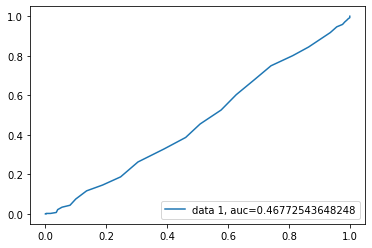

LR i = 500
0.47 accuracy with a standard deviation of 0.07
0.49 recall with a standard deviation of 0.19
0.48 precision with a standard deviation of 0.09
0.47 f1 with a standard deviation of 0.13


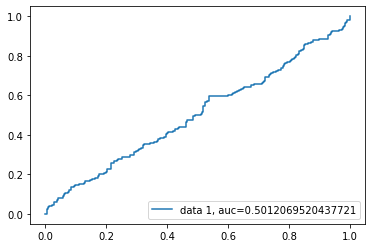

KNN i = 500
0.43 accuracy with a standard deviation of 0.07
0.42 recall with a standard deviation of 0.18
0.43 precision with a standard deviation of 0.08
0.42 f1 with a standard deviation of 0.12


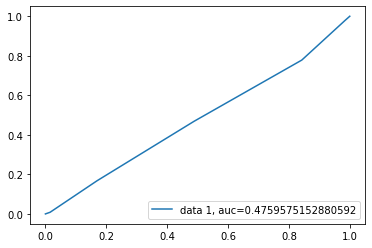

TREE i = 500
0.48 accuracy with a standard deviation of 0.04
0.52 recall with a standard deviation of 0.08
0.50 precision with a standard deviation of 0.03
0.51 f1 with a standard deviation of 0.05


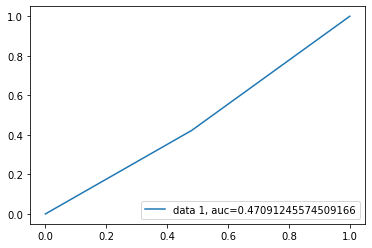

RND i = 500
0.42 accuracy with a standard deviation of 0.08
0.48 recall with a standard deviation of 0.20
0.42 precision with a standard deviation of 0.10
0.45 f1 with a standard deviation of 0.14


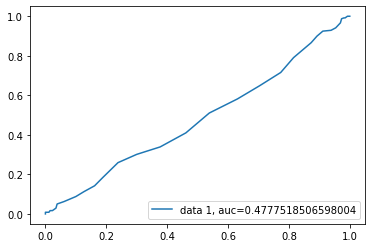

LR i = 700
0.46 accuracy with a standard deviation of 0.06
0.48 recall with a standard deviation of 0.19
0.47 precision with a standard deviation of 0.09
0.46 f1 with a standard deviation of 0.14


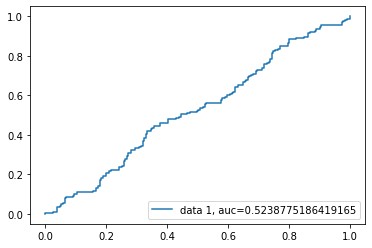

KNN i = 700
0.44 accuracy with a standard deviation of 0.08
0.41 recall with a standard deviation of 0.21
0.43 precision with a standard deviation of 0.13
0.41 f1 with a standard deviation of 0.16


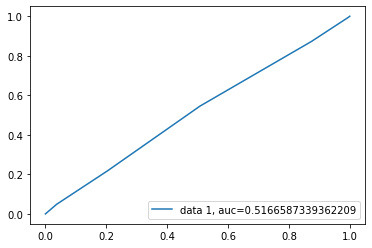

TREE i = 700
0.48 accuracy with a standard deviation of 0.08
0.47 recall with a standard deviation of 0.14
0.47 precision with a standard deviation of 0.09
0.48 f1 with a standard deviation of 0.12


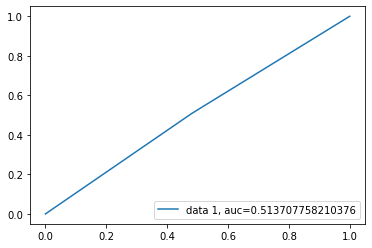

RND i = 700
0.38 accuracy with a standard deviation of 0.13
0.42 recall with a standard deviation of 0.24
0.37 precision with a standard deviation of 0.16
0.41 f1 with a standard deviation of 0.19


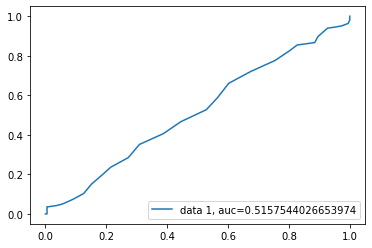

LR i = 1000
0.47 accuracy with a standard deviation of 0.06
0.49 recall with a standard deviation of 0.16
0.48 precision with a standard deviation of 0.08
0.48 f1 with a standard deviation of 0.12


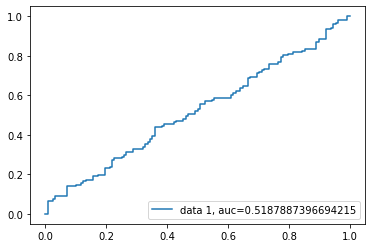

KNN i = 1000
0.45 accuracy with a standard deviation of 0.08
0.43 recall with a standard deviation of 0.18
0.46 precision with a standard deviation of 0.12
0.44 f1 with a standard deviation of 0.15


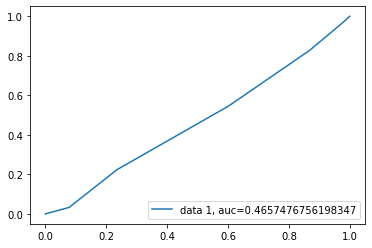

TREE i = 1000
0.49 accuracy with a standard deviation of 0.05
0.50 recall with a standard deviation of 0.07
0.53 precision with a standard deviation of 0.03
0.52 f1 with a standard deviation of 0.05


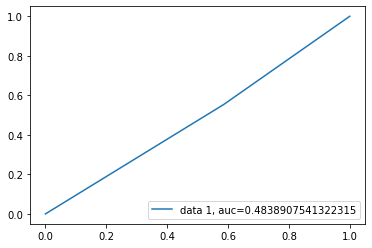

RND i = 1000
0.42 accuracy with a standard deviation of 0.10
0.50 recall with a standard deviation of 0.25
0.40 precision with a standard deviation of 0.16
0.43 f1 with a standard deviation of 0.20


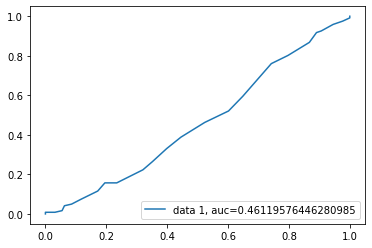

In [58]:
for i in [1,5,10,50,100,300,500,700,1000]:
  l = len(df)
  for j in range(1, len(df)):
    if l % i == 0:
      break
    l -= 1
  X = pd.DataFrame(np.array(df[num_columns][:l]).reshape(int(l / i), len(num_columns) * i)[:-1])
  y = []
  for j in range(int(l / i)):
    y.append(sum(df["Delta"][j * i:(j + 1) * i]))
  y = pd.DataFrame(y[1:])
  y["Sign"] = np.sign(y)
  y["Sign"][y["Sign"] == 0] = 1
  X_tr, X_t = X[:int(len(X) * 0.8)], X[int(len(X) * 0.8) + 1:]
  y_tr, y_t = y["Sign"][:int(len(y) * 0.8)], y["Sign"][int(len(y) * 0.8) + 1:]

  scaler = MinMaxScaler().fit(X_tr)

  X_tr = pd.DataFrame(scaler.transform(X_tr), index=X_tr.index)
  X_t = pd.DataFrame(scaler.transform(X_t), index=X_t.index)

  X = pd.concat([X_tr, X_t])
  y = pd.concat([y_tr, y_t])

  lr = LogisticRegression(max_iter=10000)
  knn = KNeighborsClassifier()
  tree = DecisionTreeClassifier()
  rnd = RandomForestClassifier()

  knn = knn.fit(X_tr, y_tr)
  lr = lr.fit(X_tr, y_tr)
  tree = tree.fit(X_tr, y_tr)
  rnd = rnd.fit(X_tr, y_tr)

  print("LR i = " + str(i))
  temp = score(X, y, lr)
  lr_accuracy[0].append(temp[0])
  lr_accuracy[1].append(temp[1])
  lr_recall[0].append(temp[2])
  lr_recall[1].append(temp[3])
  lr_precision[0].append(temp[4])
  lr_precision[1].append(temp[5])
  lr_f1[0].append(temp[6])
  lr_f1[1].append(temp[7])

  print("KNN i = " + str(i))
  temp = score(X, y, knn)
  knn_accuracy[0].append(temp[0])
  knn_accuracy[1].append(temp[1])
  knn_recall[0].append(temp[2])
  knn_recall[1].append(temp[3])
  knn_precision[0].append(temp[4])
  knn_precision[1].append(temp[5])
  knn_f1[0].append(temp[6])
  knn_f1[1].append(temp[7])  
    
  print("TREE i = " + str(i))
  temp = score(X, y, tree)
  tree_accuracy[0].append(temp[0])
  tree_accuracy[1].append(temp[1])
  tree_recall[0].append(temp[2])
  tree_recall[1].append(temp[3])
  tree_precision[0].append(temp[4])
  tree_precision[1].append(temp[5])
  tree_f1[0].append(temp[6])
  tree_f1[1].append(temp[7])  
    
  print("RND i = " + str(i))
  temp = score(X, y, rnd)
  rnd_accuracy[0].append(temp[0])
  rnd_accuracy[1].append(temp[1])
  rnd_recall[0].append(temp[2])
  rnd_recall[1].append(temp[3])
  rnd_precision[0].append(temp[4])
  rnd_precision[1].append(temp[5])
  rnd_f1[0].append(temp[6])
  rnd_f1[1].append(temp[7])  

In [115]:
def summary_graph(x, error):
    size = len(x)-3
    x = x[:size]
    error = error[:size]
    fig, ax0 = plt.subplots( sharex=True)
    ax0.errorbar([1,5,10,50,100,150,500,700,1000][:6],x, yerr=error, fmt='-o')
    plt.show()

LR summary

Accuracy with standard deviation


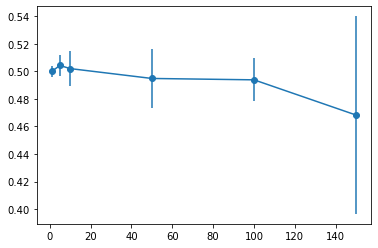

Recall with standard deviation


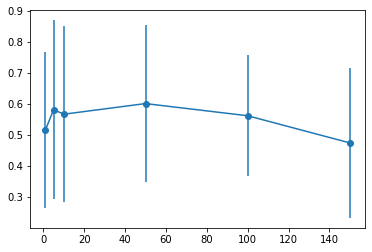

Precision with standard deviation


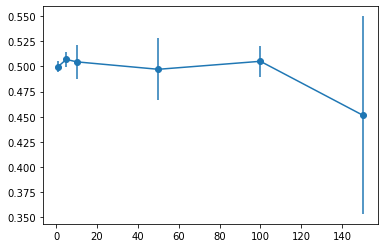

F1 score with standard deviation


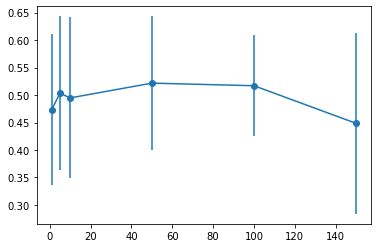

In [116]:
print("LR summary")
print()
print("Accuracy with standard deviation")
summary_graph(lr_accuracy[0], lr_accuracy[1])
print("Recall with standard deviation")
summary_graph(lr_recall[0], lr_recall[1])
print("Precision with standard deviation")
summary_graph(lr_precision[0], lr_precision[1])
print("F1 score with standard deviation")
summary_graph(lr_f1[0], lr_f1[1])

KNN summary

Accuracy with standard deviation


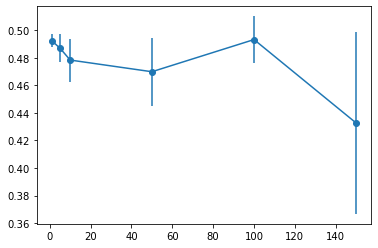

Recall with standard deviation


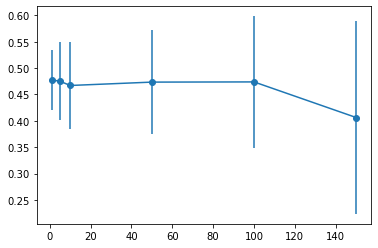

Precision with standard deviation


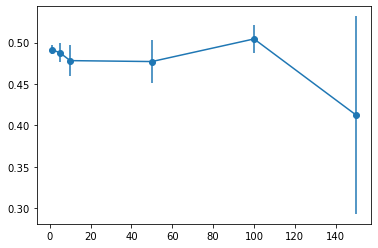

F1 score with standard deviation


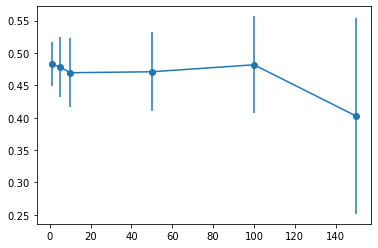

In [120]:
print("KNN summary")
print()
print("Accuracy with standard deviation")
summary_graph(knn_accuracy[0], knn_accuracy[1])
print("Recall with standard deviation")
summary_graph(knn_recall[0], knn_recall[1])
print("Precision with standard deviation")
summary_graph(knn_precision[0], knn_precision[1])
print("F1 score with standard deviation")
summary_graph(knn_f1[0], knn_f1[1])

TREE summary

Accuracy with standard deviation


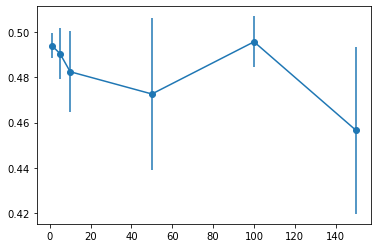

Recall with standard deviation


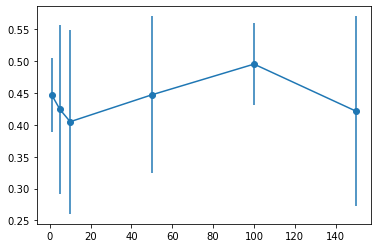

Precision with standard deviation


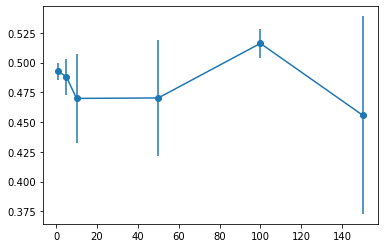

F1 score with standard deviation


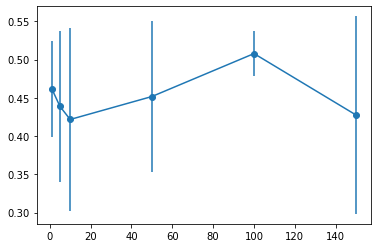

In [118]:
print("TREE summary")
print()
print("Accuracy with standard deviation")
summary_graph(tree_accuracy[0], tree_accuracy[1])
print("Recall with standard deviation")
summary_graph(tree_recall[0], tree_recall[1])
print("Precision with standard deviation")
summary_graph(tree_precision[0], tree_precision[1])
print("F1 score with standard deviation")
summary_graph(tree_f1[0], tree_f1[1])

RND summary

Accuracy with standard deviation


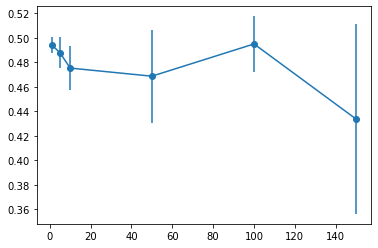

Recall with standard deviation


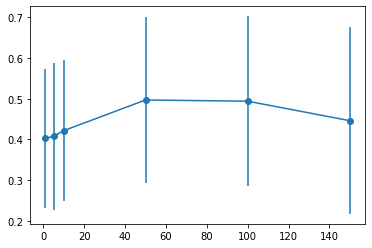

Precision with standard deviation


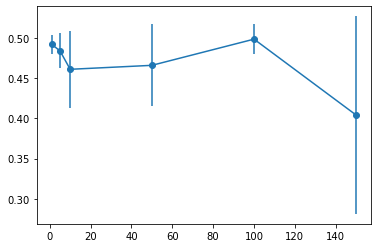

F1 score with standard deviation


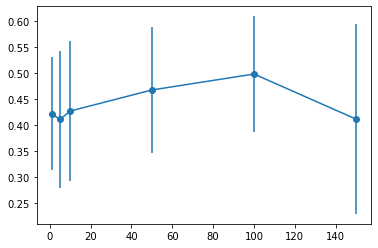

In [119]:
print("RND summary")
print()
print("Accuracy with standard deviation")
summary_graph(rnd_accuracy[0], rnd_accuracy[1])
print("Recall with standard deviation")
summary_graph(rnd_recall[0], rnd_recall[1])
print("Precision with standard deviation")
summary_graph(rnd_precision[0], rnd_precision[1])
print("F1 score with standard deviation")
summary_graph(rnd_f1[0], rnd_f1[1])

In [113]:
df

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Delta,Day of Week,Day of Month,Month of Year,Week of Year,Hour of Day,Minute of Hour
0,7187.67,7188.06,7182.20,7184.03,7.248148,5.208013e+04,135.0,2.031772,1.459921e+04,-3.64,2,1,1,1,0,1
1,7184.41,7184.71,7180.26,7182.43,11.681677,8.390374e+04,202.0,5.479244,3.935708e+04,-1.98,2,1,1,1,0,2
2,7183.83,7188.94,7182.49,7185.94,10.025391,7.203323e+04,136.0,3.294966,2.368057e+04,2.11,2,1,1,1,0,3
3,7185.54,7185.54,7178.64,7179.78,14.911105,1.070665e+05,161.0,2.369033,1.701202e+04,-5.76,2,1,1,1,0,4
4,7179.76,7182.51,7178.20,7179.99,12.463243,8.948436e+04,143.0,3.652785,2.622507e+04,0.23,2,1,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249919,29609.67,29616.30,29580.85,29609.09,71.448680,2.114843e+06,1371.0,34.473290,1.020366e+06,-0.58,3,19,5,20,13,25
1249920,29609.09,29619.45,29601.52,29608.40,25.120540,7.438830e+05,838.0,7.827100,2.317620e+05,-0.69,3,19,5,20,13,26
1249921,29608.39,29657.95,29608.39,29647.81,98.136750,2.908183e+06,1445.0,58.440970,1.731826e+06,39.42,3,19,5,20,13,27
1249922,29647.80,29683.91,29647.80,29650.01,36.533750,1.083764e+06,1109.0,12.672770,3.759155e+05,2.21,3,19,5,20,13,28


In [107]:
rnd_accuracy[0][2], rnd_accuracy[1][2]

(0.47524601968157454, 0.018218722276008265)

In [114]:
np.sign(df["Delta"][df["Delta"] != 0]).value_counts()

-1.0    625144
 1.0    621110
Name: Delta, dtype: int64

In [125]:
from scipy.stats import ttest_ind

In [128]:
ttest_ind(rnd_accuracy[0][2], lr_accuracy[0][2])

Ttest_indResult(statistic=nan, pvalue=nan)

In [129]:
from scipy import stats
rng = np.random.default_rng()

In [131]:
rvs1

array([-1.43594660e+00,  1.43714525e+01,  2.16748708e+00, -6.24801049e+00,
        9.79254077e-01, -2.78435820e+00,  4.06010759e+00,  1.34389874e+01,
        4.39713136e+00,  1.25902582e+01, -1.56208225e+01,  1.43676697e+01,
       -4.33748418e+00,  1.21678040e+01,  4.68585394e+00,  1.34132776e+01,
        1.74851807e+00,  8.12231278e+00,  1.05436802e+01,  4.98392991e+00,
       -5.33028135e+00,  1.04538689e+01, -7.82364423e+00, -5.38517945e+00,
        1.35312796e+01,  1.92792679e+01,  9.07042528e+00,  6.74662530e+00,
        1.65632006e+01,  9.77425633e+00, -3.31914005e+00, -2.64892580e+00,
       -1.79110599e+01,  8.37753146e+00,  7.23418473e+00,  2.51920186e+00,
        4.77953577e-01,  1.67888987e+00, -4.93725852e+00, -1.21550679e+01,
        1.50601601e+01,  1.34524950e+01,  2.27154950e+00,  5.73557234e+00,
        5.28012092e+00,  1.70320436e+01,  5.39783648e+00,  1.06687709e+01,
        1.85854470e+01, -9.20921970e+00,  5.18925395e+00, -2.48133274e+00,
        8.27387574e+00, -

In [151]:
stats.ttest_ind(lr_accuracy[0], rnd_accuracy[0])

Ttest_indResult(statistic=2.1928246207244935, pvalue=0.043446454407279796)

In [140]:
df

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Delta,Day of Week,Day of Month,Month of Year,Week of Year,Hour of Day,Minute of Hour
0,7187.67,7188.06,7182.20,7184.03,7.248148,5.208013e+04,135.0,2.031772,1.459921e+04,-3.64,2,1,1,1,0,1
1,7184.41,7184.71,7180.26,7182.43,11.681677,8.390374e+04,202.0,5.479244,3.935708e+04,-1.98,2,1,1,1,0,2
2,7183.83,7188.94,7182.49,7185.94,10.025391,7.203323e+04,136.0,3.294966,2.368057e+04,2.11,2,1,1,1,0,3
3,7185.54,7185.54,7178.64,7179.78,14.911105,1.070665e+05,161.0,2.369033,1.701202e+04,-5.76,2,1,1,1,0,4
4,7179.76,7182.51,7178.20,7179.99,12.463243,8.948436e+04,143.0,3.652785,2.622507e+04,0.23,2,1,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249919,29609.67,29616.30,29580.85,29609.09,71.448680,2.114843e+06,1371.0,34.473290,1.020366e+06,-0.58,3,19,5,20,13,25
1249920,29609.09,29619.45,29601.52,29608.40,25.120540,7.438830e+05,838.0,7.827100,2.317620e+05,-0.69,3,19,5,20,13,26
1249921,29608.39,29657.95,29608.39,29647.81,98.136750,2.908183e+06,1445.0,58.440970,1.731826e+06,39.42,3,19,5,20,13,27
1249922,29647.80,29683.91,29647.80,29650.01,36.533750,1.083764e+06,1109.0,12.672770,3.759155e+05,2.21,3,19,5,20,13,28
